### `Upsample` and `Downsample`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from module import Upsample,Downsample
from dataset import mnist
from util import get_torch_size_string,plot_4x4_torch_tensor
np.set_printoptions(precision=3)
th.set_printoptions(precision=3)
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(th.__version__))

PyTorch version:[2.0.1].


### MNIST

In [2]:
train_iter,test_iter,train_data,train_label,test_data,test_label = \
    mnist(root_path='../data',batch_size=128)
print ("Done.")

Done.


### Upsample and downsample module

In [3]:
updown_rate = 2
upsample = Upsample(
    n_channels = 1,
    up_rate    = updown_rate, # upsample rate
    up_mode    = 'bilinear',  # 'nearest' or 'bilinear'
    use_conv   = False,
)
downsample = Downsample(
    n_channels = 1,
    down_rate  = updown_rate, # downsample rate
    use_conv   = False,
)
# Input data
batch_size = 16
x = train_data[:batch_size,:,:].reshape((batch_size,1,28,28))/255. # [B x 1 x 28 x 28]
# Upsample
x_up = upsample(x) # [B x 1 x 28*updown_rate x 28*updown_rate]
# Downsample
x_down = downsample(x_up) # [B x 1 x 28 x 28]
print ("[Upsample] Shape x:[%s] => x_up:[%s]"%
       (get_torch_size_string(x),get_torch_size_string(x_up)))
print ("[Downsample] Shape x_up:[%s] => x_down:[%s]"%
       (get_torch_size_string(x_up),get_torch_size_string(x_down)))

[Upsample] Shape x:[16x1x28x28] => x_up:[16x1x56x56]
[Downsample] Shape x_up:[16x1x56x56] => x_down:[16x1x28x28]


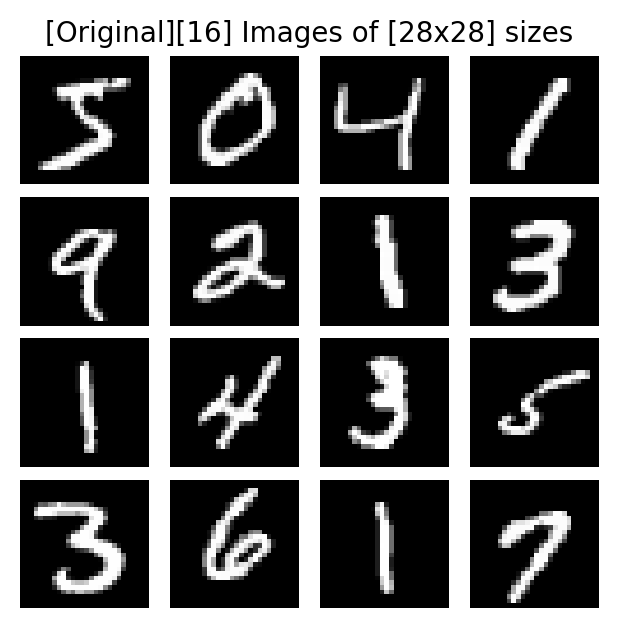

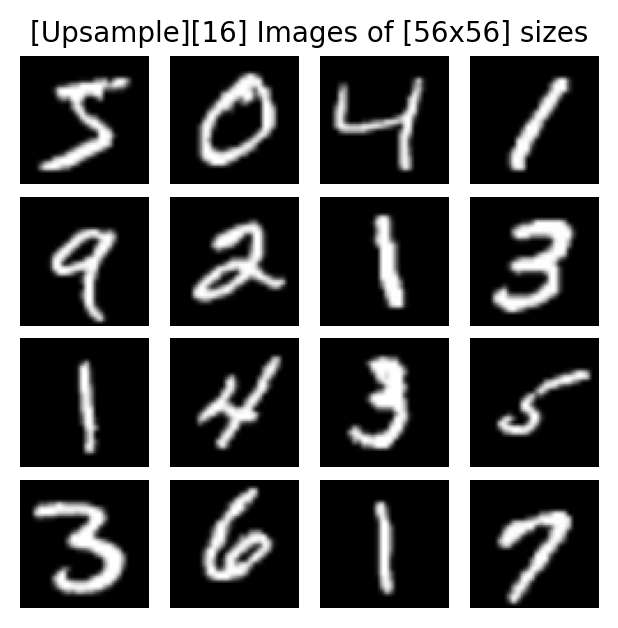

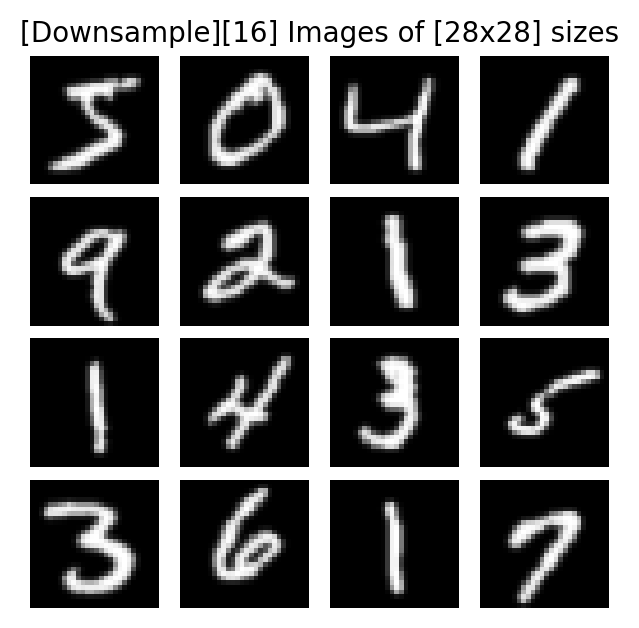

In [4]:
# Plot original images
plot_4x4_torch_tensor(x,figsize=(3,3),info_str='[Original]')
# Plot original images
plot_4x4_torch_tensor(x_up,figsize=(3,3),info_str='[Upsample]')
# Plot original images
plot_4x4_torch_tensor(x_down,figsize=(3,3),info_str='[Downsample]')

### Uneven sampling

In [5]:
updown_rate = 2
upsample = Upsample(
    n_channels = 1,
    up_rate    = (updown_rate,1), # upsample rate
    up_mode    = 'bilinear',  # 'nearest' or 'bilinear'
    use_conv   = False,
)
downsample = Downsample(
    n_channels = 1,
    down_rate  = (updown_rate,1), # downsample rate
    use_conv   = False,
)
# Input data
batch_size = 16
x = train_data[:batch_size,:,:].reshape((batch_size,1,28,28))/255. # [B x 1 x 28 x 28]
# Upsample
x_up = upsample(x) # [B x 1 x 28*updown_rate x 28*updown_rate]
# Downsample
x_down = downsample(x_up) # [B x 1 x 28 x 28]
print ("[Upsample] Shape x:[%s] => x_up:[%s]"%
       (get_torch_size_string(x),get_torch_size_string(x_up)))
print ("[Downsample] Shape x_up:[%s] => x_down:[%s]"%
       (get_torch_size_string(x_up),get_torch_size_string(x_down)))

[Upsample] Shape x:[16x1x28x28] => x_up:[16x1x56x28]
[Downsample] Shape x_up:[16x1x56x28] => x_down:[16x1x28x28]


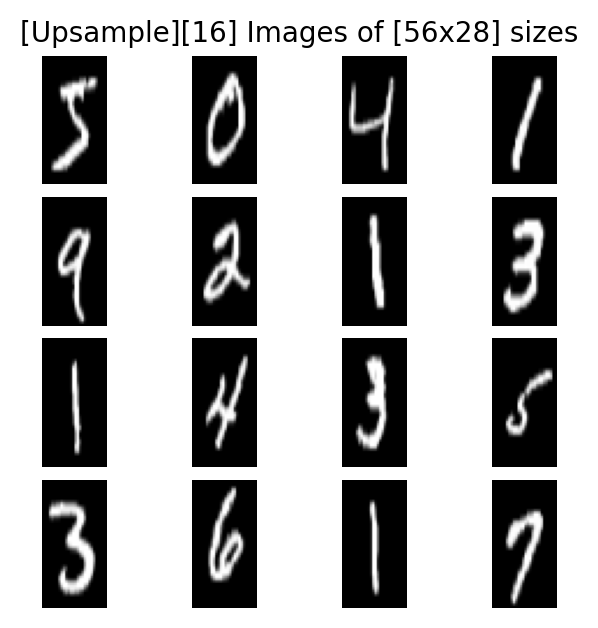

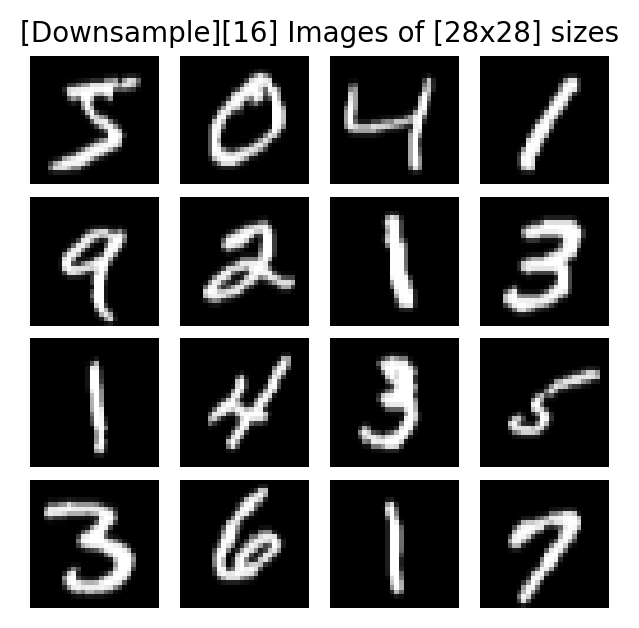

In [6]:
# Plot original images
plot_4x4_torch_tensor(x_up,figsize=(3,3),info_str='[Upsample]')
# Plot original images
plot_4x4_torch_tensor(x_down,figsize=(3,3),info_str='[Downsample]')